In [ ]:
import os
import math
import pandas                as pd
import numpy                 as np
import matplotlib.pyplot     as plt
import seaborn               as sns
from sklearn.decomposition   import PCA
from sklearn.preprocessing   import StandardScaler

In [ ]:
# https://drive.google.com/file/d/1NZzai0AM6eQSjatXZ6XXxCn52q0avYag/view?usp=drive_link
!gdown 1NZzai0AM6eQSjatXZ6XXxCn52q0avYag

Downloading...
From: https://drive.google.com/uc?id=1NZzai0AM6eQSjatXZ6XXxCn52q0avYag
To: /content/diem_thi_thptqg_2020_2023.csv
100% 229M/229M [00:02<00:00, 83.5MB/s]


In [ ]:
df = pd.read_csv('/content/diem_thi_thptqg_2020_2023.csv')
df.head()

,Unnamed: 0,ID,Math,Literature,Physics,Chemistry,Biology,History,Geography,Ethics,ForeignLanguage,Year,Province,Complex
0,0,18014547,6.4,6.75,NaN,NaN,NaN,4.75,7.00,6.50,4.2,2020,Bắc Giang,KHXH
1,1,18014530,7.6,6.00,NaN,NaN,NaN,3.75,7.75,7.75,2.8,2020,Bắc Giang,KHXH
2,3,18014517,8.0,7.00,NaN,NaN,NaN,8.25,8.00,9.50,5.8,2020,Bắc Giang,KHXH
3,4,18014523,8.2,6.50,8.0,8.5,5.0,NaN,NaN,NaN,4.0,2020,Bắc Giang,KHTN
4,6,18014518,7.4,7.00,NaN,NaN,NaN,3.75,5.75,7.75,3.6,2020,Bắc Giang,KHXH


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3386212 entries, 0 to 3386211
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   ID               int64  
 2   Math             float64
 3   Literature       float64
 4   Physics          float64
 5   Chemistry        float64
 6   Biology          float64
 7   History          float64
 8   Geography        float64
 9   Ethics           float64
 10  ForeignLanguage  float64
 11  Year             int64  
 12  Province         object 
 13  Complex          object 
dtypes: float64(9), int64(3), object(2)
memory usage: 361.7+ MB


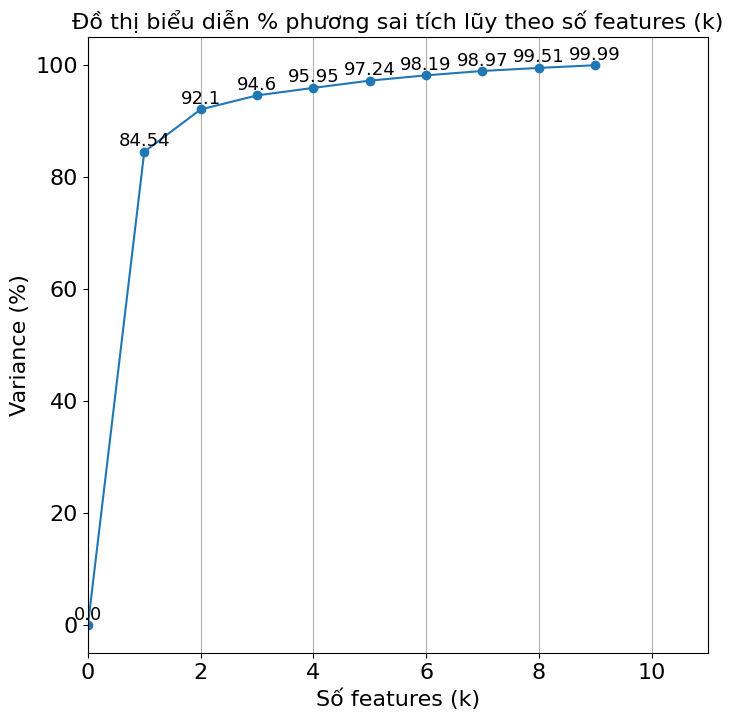

In [ ]:
## Vẽ đồ thị biểu diễn % phương sai tích lũy theo số features --> chọn k theo điểm "gẫy"

numeric_data = df.drop(['Unnamed: 0', 'ID', 'Year', 'Province', 'Complex'], axis=1)
numeric_data.fillna(0, inplace=True)

pca = PCA().fit(numeric_data)
points = np.cumsum(pca.explained_variance_ratio_) * 100 # Các điểm dữ liệu
points = np.insert(points, 0, 0) # Thêm điểm k = 0, variance = 0
x_i = np.arange(0, numeric_data.shape[1] + 1)
y_i = (points[-13:])//0.01/100

plt.figure(figsize = (8, 8))
plt.plot(points, marker = 'o')
plt.xlabel('Số features (k)', fontsize = 16)
plt.ylabel('Variance (%)', fontsize = 16)
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số features (k)', fontsize = 16)
plt.xlim([0, numeric_data.shape[1] + 1 + 1])
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.grid(axis = 'x')

for i in x_i:
    plt.text(i, y_i[i] + 1, y_i[i], ha = 'center', va = 'baseline', fontsize = 13) # tung độ của text cao hơn point 1 đơn vị

plt.savefig('explained_variance_ratio.pdf')
plt.show()

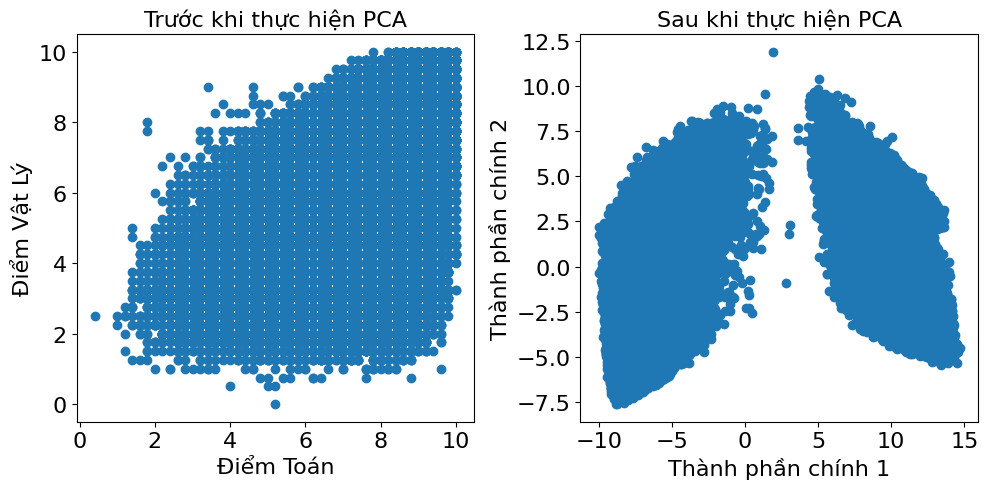

In [ ]:
reduced_data = pca.fit_transform(numeric_data)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['Math'], df['Physics'])
plt.title('Trước khi thực hiện PCA', fontsize = 16)
plt.xlabel('Điểm Toán', fontsize = 16)
plt.ylabel('Điểm Vật Lý', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

# After PCA
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title('Sau khi thực hiện PCA', fontsize = 16)
plt.xlabel('Thành phần chính 1', fontsize = 16)
plt.ylabel('Thành phần chính 2', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.tight_layout()
plt.savefig('pca.png')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    2131064
0    1255148
Name: Cluster, dtype: int64


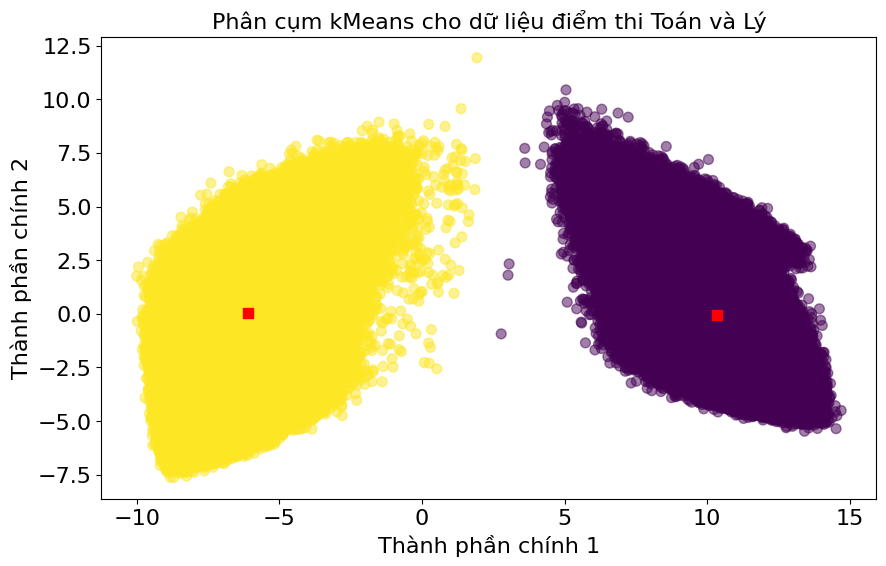

In [ ]:
from sklearn.cluster import KMeans

k = 2

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(reduced_data[:])
centroids = kmeans.cluster_centers_

df['Cluster'] = clusters
df['cluster'] = kmeans.labels_

print(df['Cluster'].value_counts())

plt.figure(figsize=(10,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="s", s=50, color='r')  # Plot centroids for all clusters
plt.title('Phân cụm kMeans cho dữ liệu điểm thi Toán và Lý', fontsize=16)
plt.xlabel('Thành phần chính 1', fontsize = 16)
plt.ylabel('Thành phần chính 2', fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('kmeans.png')
plt.show()